# Reddit Climate Change - Visualization of results: Changing perspectives

Supervision: Prof. Dr. Jan Fabian Ehmke

Group members: Britz Luis, Huber Anja, Krause Felix Elias, Preda Yvonne-Nadine

Time: Summer term 2023 

Data: https://www.kaggle.com/datasets/pavellexyr/the-reddit-climate-change-dataset

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as pltc
import matplotlib.ticker as mtick

In [70]:
# Corporate Design
plt.rc('font', size=14)
plt.rcParams["figure.figsize"] = (10,8)
plt.rcParams["font.family"] = "Arial"

In [76]:
# Load data
# df = pd.read_csv("data/topic_large_categories.csv", delimiter=";")
# df.columns = ["topic", "share", "category", "year"]

df = pd.read_csv("data/topic_general_labels.csv", delimiter=";")
df.columns = ["year", "topic", "share", "category_cleaned"]

In [77]:
df

,year,topic,share,category_cleaned
0,2010,0 people_just_climate_global,0.4343,general
1,2010,1 skeptics_skepticism_skeptic_denial,0.0088,skepticism
2,2010,2 gore_al_people_global,0.0082,skepticism
3,2010,3 population_overpopulation_children_people,0.0076,political discussion
4,2010,4 models_model_climate_predictions,0.0073,scientific discussion
...,...,...,...,...
60,2022,0 people_like_just_don,0.3863,general
61,2022,1 protest_protests_protesting_protesters,0.0120,political action
62,2022,2 god_church_religion_bible,0.0071,skepticism
63,2022,3 plastic_recycling_plastics_straws,0.0060,political action


In [4]:
# Assign to broader categories
# df["category_cleaned"] = ["political discussion" if "political discussion" in i else i for i in df.category]
# df["category_cleaned"] = ["political action" if "political action" in i else i for i in df.category_cleaned]
# df["category_cleaned"] = ["skepticism" if "skepticism" in i else i for i in df.category_cleaned]
# df["category_cleaned"] = ["scientific discussion" if "scientific discussion" in i else i for i in df.category_cleaned]

# # Group rest 
# classes = ['general', 'individual responsibility', 'political action',
#        'political discussion', 'scientific discussion', 'skepticism']
# df["category_cleaned"] = ["general" if i not in classes else i for i in df.category_cleaned]

In [5]:
df.head(10)

,topic,share,category,year,category_cleaned
0,0_people_just_climate_global,43.43,general,2010,general
1,1_skeptics_skepticism_skeptic_denial,0.88,skepticism,2010,skepticism
2,2_gore_al_people_global,0.82,skepticism,2010,skepticism
3,3_population_overpopulation_children_people,0.76,political discussion (also partly on individua...,2010,political discussion
4,4_models_model_climate_predictions,0.73,scientific discussion/education/explanations,2010,scientific discussion
5,0_people_just_like_climate,35.73,general,2011,general
6,1_meat_food_animals_eat,1.30,scientific discussion/education/explanations w...,2011,scientific discussion
7,2_religion_god_religious_people,1.23,skepticism,2011,skepticism
8,3_canada_harper_canadian_government,1.18,political actions/event,2011,political action
9,4_hiv_science_aids_mullis,0.82,skepticism,2011,skepticism


In [6]:
np.unique(df.category_cleaned)

array(['general', 'individual responsibility', 'political action',
       'political discussion', 'scientific discussion', 'skepticism'],
      dtype=object)

In [7]:
df.columns

Index(['topic', 'share', 'category', 'year', 'category_cleaned'], dtype='object')

In [82]:
aggr_df = df[~df.category_cleaned.isin(["general", "scientific discussion", "individual responsibility"])] #, "individual responsibility"
aggr_df = aggr_df.groupby(["year", "category_cleaned"]).sum().reset_index()
aggr_df.share = aggr_df.share
aggr_df.head(5)

C:\Users\Felix\AppData\Local\Temp\ipykernel_11920\521853053.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  aggr_df = aggr_df.groupby(["year", "category_cleaned"]).sum().reset_index()


,year,category_cleaned,share
0,2010,political discussion,0.0076
1,2010,skepticism,0.0170
2,2011,political action,0.0118
3,2011,skepticism,0.0205
4,2012,political discussion,0.0040


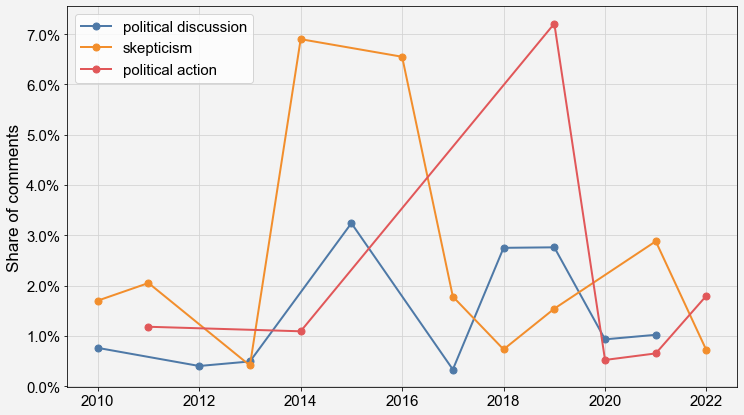

In [84]:
# Plot final result
plt.rc('font', size=15)
plt.rcParams["figure.figsize"] = (12,7)
custom_colors = ["#4e79a7","#f28e2c","#e15759","#76b7b2","#59a14f","#edc949","#af7aa1","#ff9da7","#9c755f","#bab0ab"]
plt.figure(facecolor='#F3F3F3')
ax = plt.axes()
ax.set_facecolor("#F3F3F3")

for idx, category in enumerate(aggr_df.category_cleaned.unique()):
    sample = aggr_df[aggr_df.category_cleaned == category]
    plt.plot(sample.year, sample.share, marker="o", linestyle="-", linewidth=2, markersize=7, label=category, c=custom_colors[idx])

# Axis as percentages
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1))

plt.legend()
plt.title("Share of Comments Categorized to High-Level Groups Over Time", size=20, pad=15)
plt.ylabel("Share of comments", size=17)
plt.grid(color="lightgrey")

# Save plot
# plt.savefig("final_plots/perspectives.svg", bbox_inches='tight')

plt.show()